# Selection of well location

Glavrosgosneft oil company needs to decide where to drill a new well.

The steps for choosing a location are usually as follows:

- In the selected region, characteristics for wells are collected: the quality of oil and the volume of its reserves;
- Build a model to predict the volume of reserves in new wells;
- Select wells with the highest value estimates;
- Determine the region with the maximum total profit of the selected wells.

We have been provided with oil samples in three regions. The characteristics for each well in the region are already known. It is necessary to build a model to determine the region where mining will bring the greatest profit and analyze the possible profits and risks with Bootstrap technology.

## Data description

The exploration data of the three regions are in the files:

- /datasets/geo_data_0.cs;
- /datasets/geo_data_1.csv;
- /datasets/geo_data_2.csv;
- id — unique well ID;
- f0, f1, f2 — three signs of dots (it doesn't matter what they mean, but the signs themselves are significant);
- product — the volume of reserves in the well (thousand barrels).

## Task conditions:

- Only linear regression is suitable for training the model (the rest are not predictable enough).

- During the exploration of the region, 500 points are explored, from which 200 best ones are selected for development using machine learning.

- The budget for the development of wells in the region is 10 billion rubles.

- At current prices, one barrel of raw materials brings 450 rubles of income. The income from each unit of the product is 450 thousand rubles, since the volume is indicated in thousands of barrels.

- After the risk assessment, you need to leave only those regions in which the probability of losses is less than 2.5%. Among them, the region with the highest average profit is chosen.

Synthetic data: details of contracts and characteristics of deposits are not disclosed.

## Loading and preparing data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error 

In [2]:
data_1 = pd.read_csv('geo_data_0.csv')
data_2 = pd.read_csv('geo_data_1.csv')
data_3 = pd.read_csv('geo_data_2.csv')

In [3]:
# checking a table for missings and data types
data = [data_1,data_2,data_3]
for i in data:
    print(i.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column  

Region 1


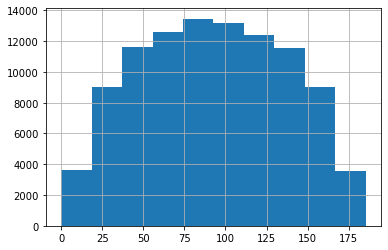

Region 2


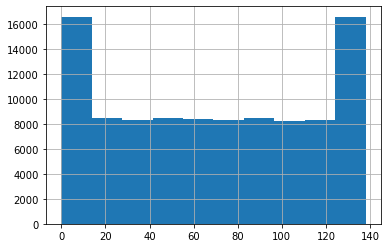

Region 3


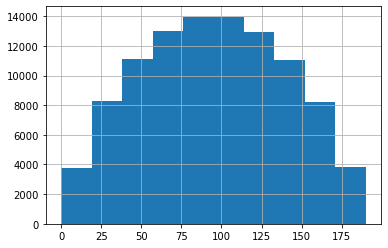

In [4]:
for i,x in enumerate(data):
    print(f'Region {i+1}')
    x['product'].hist()
    plt.show()  

In [5]:
# basic statistical parameters
data_2.describe()

,f0,f1,f2,product
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,1.141296,-4.796579,2.494541,68.825000
std,8.965932,5.119872,1.703572,45.944423
min,-31.609576,-26.358598,-0.018144,0.000000
25%,-6.298551,-8.267985,1.000021,26.953261
50%,1.153055,-4.813172,2.011479,57.085625
75%,8.621015,-1.332816,3.999904,107.813044
max,29.421755,18.734063,5.019721,137.945408


In [6]:
# unique values
data_2['product'].value_counts()

53.906522     8472
26.953261     8468
84.038886     8431
57.085625     8390
3.179103      8337
80.859783     8320
30.132364     8306
134.766305    8304
110.992147    8303
0.000000      8235
137.945408    8233
107.813044    8201
Name: product, dtype: int64

In [7]:
for i,x in enumerate(data):
    print(f'Средние добыча со скважины в {i+1} таблице =',x['product'].mean())
    #print(x['product'].mean())

Средние добыча со скважины в 1 таблице = 92.49999999999974
Средние добыча со скважины в 2 таблице = 68.82500000002561
Средние добыча со скважины в 3 таблице = 95.00000000000041


In [8]:
for i,x in enumerate(data):
    print(f'Количество дубликатов в {i+1} таблице = {x.duplicated().sum()}')

Количество дубликатов в 1 таблице = 0
Количество дубликатов в 2 таблице = 0
Количество дубликатов в 3 таблице = 0


In [9]:
for i,x in enumerate(data):
    print(f'Количество дубликатов в {i+1} таблице в столбце id =', x['id'].duplicated().sum())

Количество дубликатов в 1 таблице в столбце id = 10
Количество дубликатов в 2 таблице в столбце id = 4
Количество дубликатов в 3 таблице в столбце id = 4


In [10]:
# deleting a column with a well index
data_1 = data_1.drop(['id'], axis=1)
data_2 = data_2.drop(['id'], axis=1)
data_3 = data_3.drop(['id'], axis=1)

**Conclusion**

The data has been verified and is ready for further processing

## Train and validate the model

In [11]:
# Calculation of RMSE and the average value of predicted reserves
def rmse(dat):
      for i in data:
        features = dat.drop(['product'], axis = 1)
        target = dat['product']

        features_train, features_valid, target_train, target_valid = train_test_split(features,\
                                                                                      target,\
                                                                                      test_size=0.25,\
                                                                                      random_state = 12345)
        model = LinearRegression()
        model = model.fit(features_train, target_train)
        prediction = model.predict(features_valid)
        prediction = pd.Series(prediction)   
        rmse = mean_squared_error(target_valid, prediction) ** 0.5
        
        return prediction.sum(), rmse

In [12]:
dat = [data_1, data_2, data_3]

for i,x in enumerate(dat):
    print(f'Таблица_{i+1}',rmse(x))

Таблица_1 (2314814.194609509, 37.5794217150813)
Таблица_2 (1718213.6723861499, 0.8930992867756168)
Таблица_3 (2374126.1492001223, 40.02970873393434)


The smaller the rmse the better the regression model.
The second region has the smallest standard deviation. 
There is an assumption that this is an overfitting due to the unusual distribution of flow rates in the second region.

## Preprocessing for profit calculation

In [13]:
budget = 10_000_000 # total budget
chosen_points = 500
best_points = 200
price_per_barrel = 450 # RuR for barrel

In [14]:
profit_per_point = budget / best_points
print('Profit for 1 well -',  round(profit_per_point, 1), 'ru')

barrels_per_point = (profit_per_point  / price_per_barrel)
print('Volume of oil per well -',  round(barrels_per_point,1), ' 10^3 barrels')

barrels = (budget / price_per_barrel) 
print('Average volume of oil per region -', round(barrels,1), ' 10^3 barrels')

Profit for 1 well - 50000.0 ru
Volume of oil per well - 111.1  10^3 barrels
Average volume of oil per region - 22222.2  10^3 barrels


In [15]:
for i,x in enumerate(data):
    print(f'Average production from a well in {i+1} table =', round(x['product'].mean(),1) ,' 10^3 barrels')

Average production from a well in 1 table = 92.5  10^3 barrels
Average production from a well in 2 table = 68.8  10^3 barrels
Average production from a well in 3 table = 95.0  10^3 barrels


In [16]:
def get_prediction(dat):
      for i in data:
        features = dat.drop(['product'], axis = 1)
        target = dat['product']

        features_train,features_valid,target_train,target_valid = train_test_split(features, target, test_size=0.25,
                                                                                   random_state = 12345)
        model = LinearRegression()
        model = model.fit(features_train,target_train)
        prediction = model.predict(features_valid)
        prediction = pd.Series(prediction) 
        
        return prediction

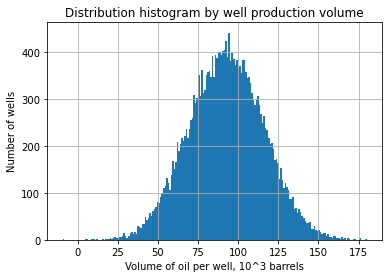

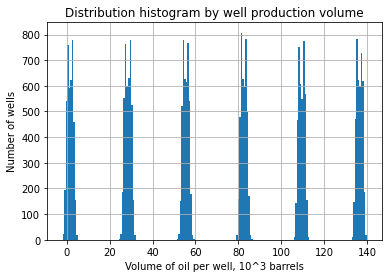

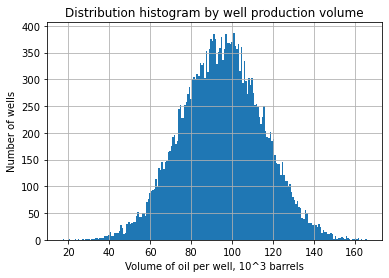

In [17]:
for i in dat:    
    get_prediction(i).hist(bins=200)
    plt.xlabel("Volume of oil per well, 10^3 barrels")
    plt.ylabel("Number of wells")
    plt.title("Distribution histogram by well production volume")
    plt.show()

The average actual stocks have been studied. For the first and third regions, the high probability will pay off. The spread of values around the average is 92.5 and 95. This means that the stocks are more than necessary.

In the second region, there are a lot of values ​​more than 111, so there is a high probability of paying off.

## Function to calculate profit from selected wells and model predictions

In [18]:
# profit calculation function
def get_hydrocarbon_profit(target, probabilities, count):
    probs_sorted = probabilities.sort_values(ascending=False)
    selected = target[probs_sorted.index][:count]
    return price_per_barrel * selected.sum() - budget

## Calculation of profit and risks

In [19]:
state = np.random.RandomState(12345)

In [20]:
# predictions and answers
def get_prediction_and_target(dat):
      for i in data:
        features = dat.drop(['product'], axis = 1)
        target = dat['product']

        features_train, features_valid, target_train, target_valid = train_test_split(features, target, test_size=0.25,
                                                                                   random_state = 12345)
        model = LinearRegression()
        model = model.fit(features_train, target_train)
        prediction = model.predict(features_valid)
        prediction = pd.Series(prediction)
        target_valid = target_valid.reset_index(drop=True)
        return target_valid, prediction

In [21]:
def bootstrap(target, probabilities):
    values = []
    expenditure = 0
    for i in range(1000):
        target_sample = target.sample(n=500, replace=True, random_state=state)
        probs_sample = probabilities[target_sample.index]
        profit = get_hydrocarbon_profit(target, probs_sample, 200)
        if profit < 0:
            expenditure +=1
        values.append(profit)
    
    values = pd.Series(values)
    lower = values.quantile(0.025)
    upper = values.quantile(0.975)
    average = values.mean()
    risk = expenditure / 1000
    return average, lower, upper, risk

In [22]:
target_1, prediction_1 = get_prediction_and_target(data_1)
average_1, low_1, upp_1, risk_1 = bootstrap(target_1, prediction_1)
print('First region')
print(f"Average profit:{round(average_1, 1)}")
print(f'95% confidence interval: from {round(low_1, 1)} [10^3 ru] to {round(upp_1, 1)}[10^3 ru]')
print(f'Percent Risk {round(risk_1, 2) * 100}')

First region
Average profit:396165.0
95% confidence interval: from -111215.5 [10^3 ru] to 909766.9[10^3 ru]
Percent Risk 7.000000000000001


In [23]:
target_2, prediction_2 = get_prediction_and_target(data_2)
average_2, low_2, up_2, risk_2 = bootstrap(target_2, prediction_2)
print('Second region')
print(f"Average profit:{round(average_2, 1)}")
print(f'95% confidence interval: from {round(low_2, 1)} [10^3 ru] to {round(up_2, 1)}[10^3 ru]')
print(f'Percent Risk {round(risk_2, 2) * 100}')

Second region
Average profit:461155.8
95% confidence interval: from 78050.8 [10^3 ru] to 862952.1[10^3 ru]
Percent Risk 1.0


In [24]:
target_3, prediction_3 = get_prediction_and_target(data_3)
average_3, low_3, up_3, risk_3 = bootstrap(target_3, prediction_3)
print('Second region')
print(f"Average profit:{average_3}")
print(f'95% confidence interval: from {low_3} [10^3 ru] to {up_3}[10^3 ru]')
print(f'Percent Risk {round(risk_3, 2) * 100}')

Second region
Average profit:392950.47517060395
95% confidence interval: from -112227.62537857569 [10^3 ru] to 934562.914551164[10^3 ru]
Percent Risk 7.000000000000001


Profit, interval and risks are calculated.
The second region was chosen as the most profitable. It has the least risk of not paying off, and with minimal production, we will remain in the black.

**Final conclusion:**
    
- Preprocessing and EDA have been made.
- Trained model for each region on linear regression
- Compiled a function for calculating profits in the region.
- The profit and risks for each region were calculated and the choice of the region was justified.

    
The second region turned out to be one of the best in terms of prediction indicators.